In [31]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import datetime

In [32]:
# Depth camera parameters:
FX_DEPTH = 5.8262448167737955e+02
FY_DEPTH = 5.8269103270988637e+02
CX_DEPTH = 3.1304475870804731e+02
CY_DEPTH = 2.3844389626620386e+02

In [33]:
# Open the image and display basic information
depth_image = iio.imread("." + "/images/png/depth/2023-11-08.20.31.23_depth_image.png")

print(f"Image resolution: {depth_image.shape}")
print(f"Data type: {depth_image.dtype}")
print(f"Min value: {np.min(depth_image)}")
print(f"Max value: {np.max(depth_image)}")

Image resolution: (480, 848, 3)
Data type: uint8
Min value: 0
Max value: 254


In [34]:
depth_grayscale = np.array(256 * depth_image / 0x0fff, dtype=np.uint8)
iio.imwrite(f"output/grayscale_{datetime.datetime.now().strftime('%Y%m%d_%H:%M:%S.%f')[:-3]}.png", depth_grayscale)

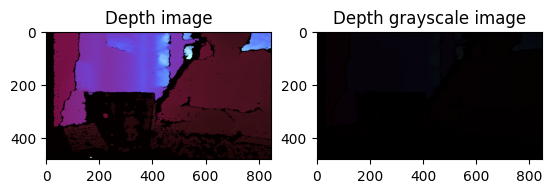

In [35]:
# Display depth and grayscale image:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(depth_image, cmap="gray")
axs[0].set_title('Depth image')
axs[1].imshow(depth_grayscale, cmap="gray")
axs[1].set_title('Depth grayscale image')
plt.show()

In [36]:
# compute point cloud:
pcd = []
depth_image.shape
height, width, index = depth_image.shape
for i in range(height):
    for j in range(width):
        z = depth_image[i][j]
        x = (j - CX_DEPTH) * z / FX_DEPTH
        y = (i - CY_DEPTH) * z / FY_DEPTH
        pcd.append([x, y, z])
    
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)